In [151]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

import torch
from torch.utils.data import Subset

import torchvision.transforms as transforms
import torchvision as tv
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

Загружаем датасет, применяем нормализацию и сплиттим на тренировочную и тестовую выборки.

In [158]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

X_train = torch.stack([elem[0].flatten() for elem in train_dataset], dim=0)
y_train = torch.tensor([elem[1] for elem in train_dataset])

X_test = torch.stack([elem[0].flatten() for elem in test_dataset], dim=0)
y_test = torch.tensor([elem[1] for elem in test_dataset])

Создаём модель, максимальную глубину дерева выберем маленькой, чтобы дерево можно было бы нормально отрисовать. С такой глубиной точность получилась 67.47%.

In [159]:
model = DecisionTreeClassifier(max_depth=5, random_state=143)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy: 67.47%


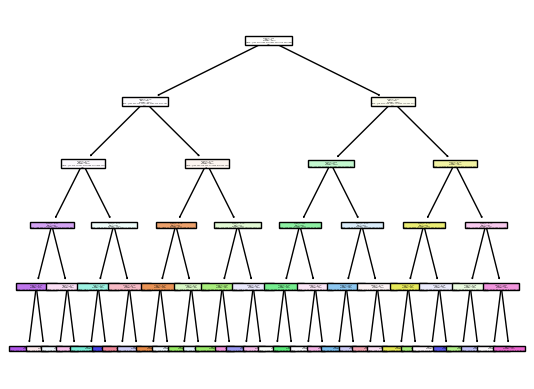

In [160]:
plot_tree(model, filled=True)
plt.show()

Увеличивая глубину дерева до 60, получаем точность 100%.

In [170]:
final_model = DecisionTreeClassifier(max_depth=130, random_state=143)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy: 87.77%


При поиске гиперпараметров удалось достичь точности в 87.77%

In [172]:
import optuna

def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 300),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10)
    }

    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-05-05 14:21:00,859] A new study created in memory with name: no-name-fc9ec2de-b218-404f-a981-f283d725d83f
[I 2023-05-05 14:21:18,869] Trial 0 finished with value: 0.8777 and parameters: {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8777.
[I 2023-05-05 14:21:34,059] Trial 1 finished with value: 0.8777 and parameters: {'max_depth': 83, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8777.
[I 2023-05-05 14:21:49,481] Trial 2 finished with value: 0.8777 and parameters: {'max_depth': 248, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8777.
[I 2023-05-05 14:22:05,039] Trial 3 finished with value: 0.8777 and parameters: {'max_depth': 228, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8777.
[I 2023-05-05 14:22:20,542] Trial 4 finished with value: 0.8777 and parameters: {'max_depth': 294, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is